# Medical Cost Personal Dataset

### Step 1: Import Libraries

In [9]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load and Read Data

In [10]:
zip_file_path = 'Medical Cost Personal.zip'  # Update with the correct path
extracted_folder = 'Medical_Cost_Data/'  # Folder to extract the files

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_file_path = extracted_folder + 'insurance.csv'  # Path to the CSV file
insurance_data = pd.read_csv(csv_file_path)

# Display first few rows and columns to check data
print("First few rows of the dataset:")
print(insurance_data.head())

print("\nColumns in the dataset:")
print(insurance_data.columns)

# Check for missing values
print("\nMissing values in the dataset:")
print(insurance_data.isnull().sum())

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Step 3: Clean Data

In [11]:
# Handle missing values
# Impute BMI (numeric) with median, Smoking status (categorical) with mode
insurance_data['bmi'].fillna(insurance_data['bmi'].median(), inplace=True)
insurance_data['smoker'].fillna(insurance_data['smoker'].mode()[0], inplace=True)

# Re-check missing values after imputation
print("\nMissing values after imputation:")
print(insurance_data.isnull().sum())


Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_29320\3465856010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_data['bmi'].fillna(insurance_data['bmi'].median(), inplace=True)
C:\Users\milto\AppData\Local\Temp\ipykernel_29320\3465856010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

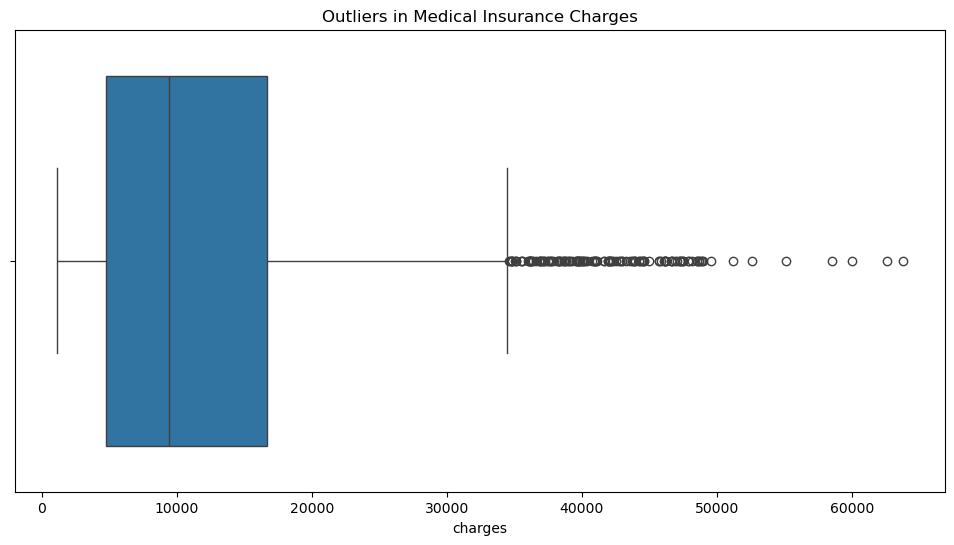


Data Summary after removing outliers:
               age          bmi     children       charges
count  1199.000000  1199.000000  1199.000000   1199.000000
mean     38.989992    30.095200     1.084237   9927.753402
std      14.068040     6.010551     1.214304   7241.158309
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4408.695900
50%      39.000000    29.735000     1.000000   8410.046850
75%      51.000000    33.820000     2.000000  12953.594600
max      64.000000    53.130000     5.000000  34472.841000


In [12]:
# Outlier detection and handling
# Visualize outliers in the 'charges' column using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_data['charges'])
plt.title('Outliers in Medical Insurance Charges')
plt.show()

# Handle outliers by applying IQR (Interquartile Range) method to 'charges'
Q1 = insurance_data['charges'].quantile(0.25)
Q3 = insurance_data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in 'charges'
insurance_data = insurance_data[(insurance_data['charges'] >= lower_bound) & 
                                 (insurance_data['charges'] <= upper_bound)]

# Data Summary after removing outliers
print("\nData Summary after removing outliers:")
print(insurance_data.describe())

### Step 4: Visualize the Data

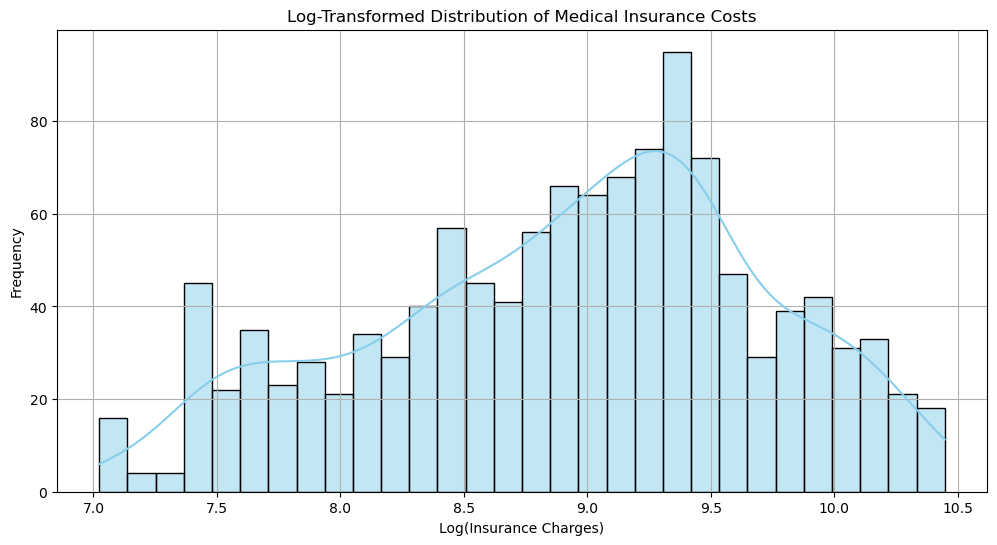

In [13]:
# Log-transform the 'charges' column to reduce skewness
insurance_data['charges'] = np.log1p(insurance_data['charges'])

# Visualize the distribution of medical costs after log transformation
plt.figure(figsize=(12, 6))
sns.histplot(insurance_data['charges'], kde=True, bins=30, color='skyblue')
plt.title('Log-Transformed Distribution of Medical Insurance Costs')
plt.xlabel('Log(Insurance Charges)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Index(['age', 'sex', 'bmi', 'children', 'charges', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


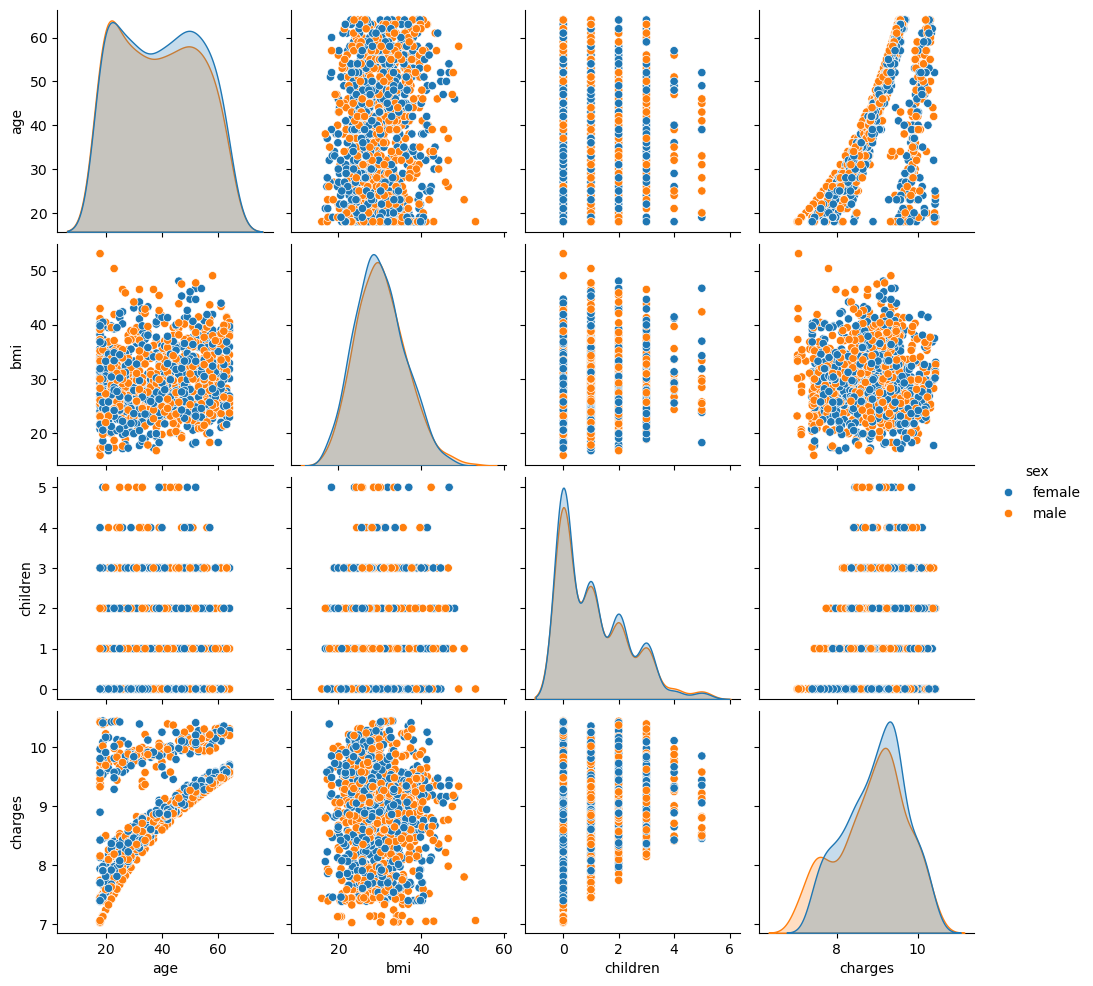

In [14]:
# Keep all regions after one-hot encoding (no drop_first)
insurance_data = pd.get_dummies(insurance_data, columns=['smoker', 'region'], drop_first=False)

# Check the new columns in the dataset
print(insurance_data.columns)

# Visualize the relationship between charges and other factors (Pairplot)
sns.pairplot(insurance_data, vars=['age', 'bmi', 'children', 'charges'], hue='sex')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_29320\1940181965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x='smoker_yes', y='charges', palette='Set2')


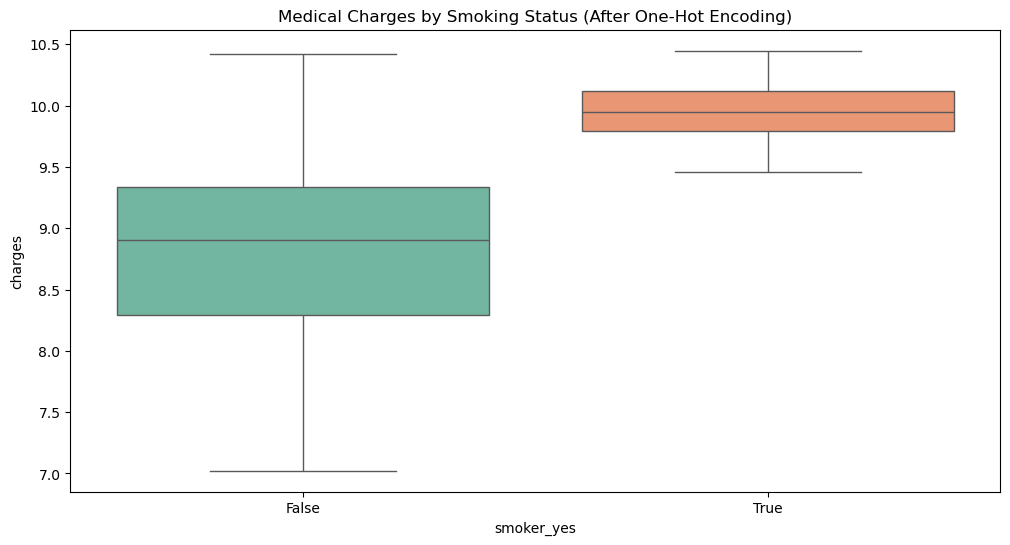

C:\Users\milto\AppData\Local\Temp\ipykernel_29320\1940181965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x='region_southeast', y='charges', palette='Set3')


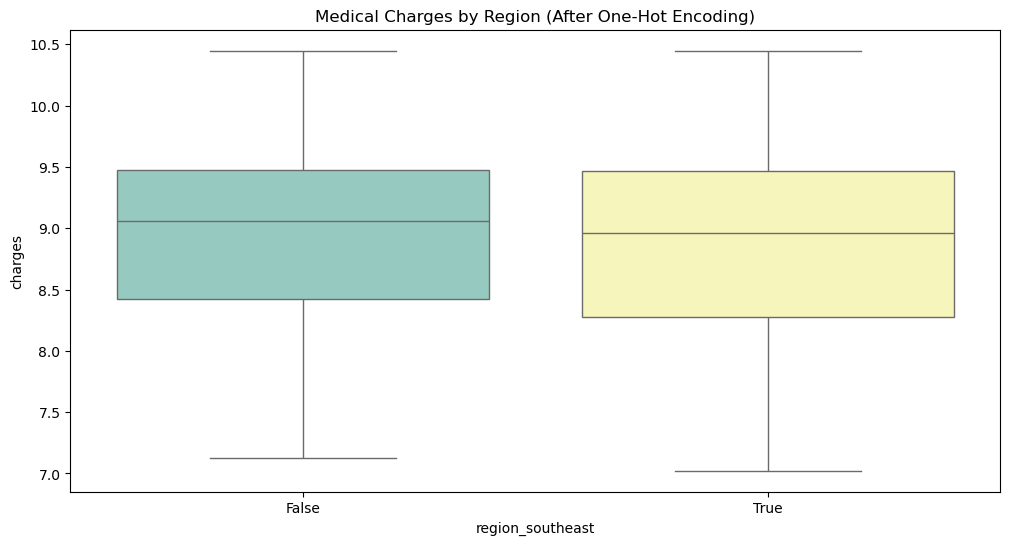

In [15]:
# Visualizing categorical features like smoker status and region on medical costs
plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_data, x='smoker_yes', y='charges', palette='Set2')
plt.title('Medical Charges by Smoking Status (After One-Hot Encoding)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_data, x='region_southeast', y='charges', palette='Set3')
plt.title('Medical Charges by Region (After One-Hot Encoding)')
plt.show()

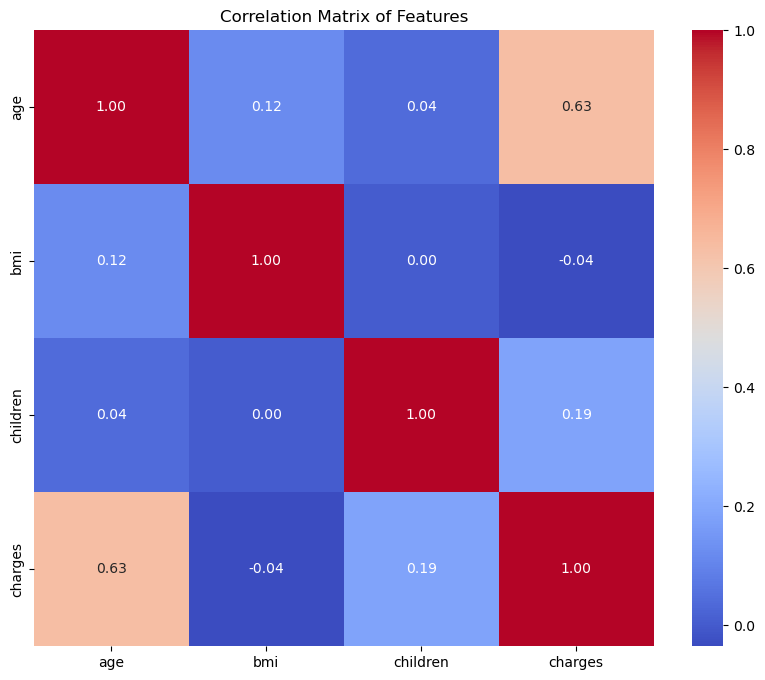


Class distribution in the dataset:
smoker_yes
False    1061
True      138
Name: count, dtype: int64


In [16]:
# Correlation between numeric features
numeric_data = insurance_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

# Check class imbalance in the dataset
print("\nClass distribution in the dataset:")
print(insurance_data['smoker_yes'].value_counts())

# If class imbalance is found, apply resampling (e.g., SMOTE, undersampling) if needed

### Step 5: Address Imbalances

In [18]:
# Separate majority and minority classes
majority = insurance_data[insurance_data['smoker_yes'] == False]
minority = insurance_data[insurance_data['smoker_yes'] == True]

# Undersample majority class to match the minority class size
majority_downsampled = majority.sample(len(minority), random_state=42)

# Combine back
balanced_data = pd.concat([majority_downsampled, minority], axis=0)

# Check the new class distribution
print("\nClass distribution after undersampling:")
print(balanced_data['smoker_yes'].value_counts())


Class distribution after undersampling:
smoker_yes
False    138
True     138
Name: count, dtype: int64
